<a href="https://colab.research.google.com/github/RFuentesAlbornoz/MachingLearning_UTAL/blob/main/Regresi%C3%B3n_lineal_RFuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

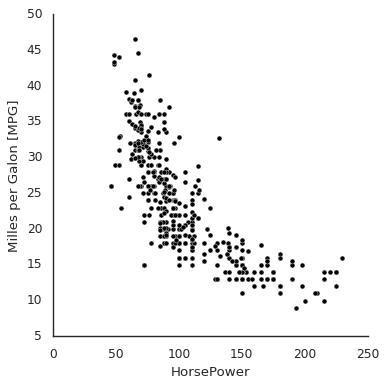

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Cargar dataset
mpg = sb.load_dataset("mpg")

# Gráfico de dispersión
sb.set_theme(style="white")
sb.relplot(x = "horsepower", y = "mpg", data = mpg, color = 'black')
plt.xlabel("HorsePower")
plt.ylabel("Milles per Galon [MPG]")
plt.show()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<ipython-input-60-f7452fe3ea58>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mcorr = mpg.corr()


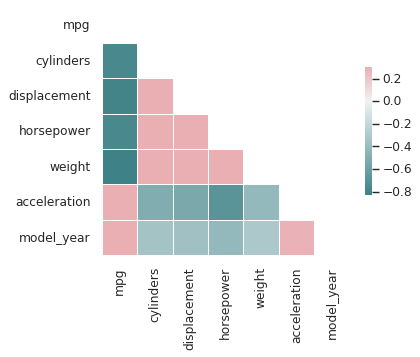

In [60]:
# Obtener la matriz de correlación
Mcorr = mpg.corr()

# Máscara para el triangulo superior
mask = np.triu(np.ones_like(Mcorr))

# Crear figura con divisiones
f, ax = plt.subplots(figsize=(5, 4))

# Mapa de colores personalizado
cmap = sb.diverging_palette(200, 10, as_cmap=True)

# Dibujar el heatmap con la máscara
sb.heatmap(Mcorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Imprimir gráfico
plt.show()

3) (1 punto) Construir y entrenar un modelo de regresion lineal


R2 regression score: 0.6438073642623536


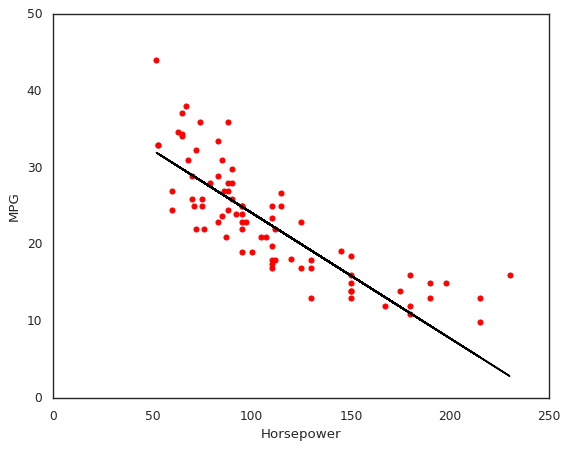

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Seleccionar la variable objetivo y la característica
X = mpg[["horsepower"]]
y = mpg["mpg"]

# Resolver datos faltantes por la media.
if X.isnull().any().any() or y.isnull().any():
    imputer = SimpleImputer(strategy = "mean")
    X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
    y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).ravel())

# Çomenzar entrenamiento y crear modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y gráficar modelo
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test,color = 'red')
plt.plot(X_test, y_pred, color = "black")
plt.xlabel("HorsePower")
plt.ylabel("Milles per Galon [MPG]")
plt.show()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_poisson_deviance, d2_pinball_score

# Las metricas disponibles en sklearn.metrics para medir el desempeño de una regresión son: explained_variance_score; max_error; mean_absolute_error; mean_squared_error; mean_squared_log_error; median_absolute_error; mean_absolute_percentage_error; r2_score; mean_poisson_deviance; mean_gamma_deviance; mean_tweedie_deviance; d2_tweedie_score; mean_pinball_loss; d2_pinball_score; y d2_absolute_error_score.
# La mayoria de ellos se basan en el error (tal como el nombre indica) con las diferencias en cómo se opera con el error. Esto permite penalizar distintos aspectos, tal como puede ser la penalización por un valor mayor del error cuadratico, o el caso contrario con el error logaritmico, que penaliza casi independientemente del valor, ya que se debe aumentar el error en ordenes de magnitud para visualziar diferencias notables.
# Por otro lado, estan los que utilizan metricas distintas, tal como el coeficiente de determinación que penalizan en función de la varianza en la variable objetivo, o basados en la desviación estandar, etc.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_poiss =  mean_poisson_deviance(y_test, y_pred)
d2_pinb = d2_pinball_score(y_test, y_pred)

# Mostrar estadisticas de desempeño
print("Error cuadrático medio:", round(mse,4))
print("Coeficiente de determinación R^2:", round(r2,4))
print("Desviación media de Poisson):", round(mean_poiss,4))
print("Función de pérdida Pinball para regresión D^2:", round(d2_pinb,4))

Error cuadrático medio: 19.1512
Coeficiente de determinación R^2: 0.6438
Desviación media de Poisson): 1.1795
Función de pérdida Pinball para regresión D^2: 0.4133


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


El par de variables con mayor correlación es: cylinders y displacement.


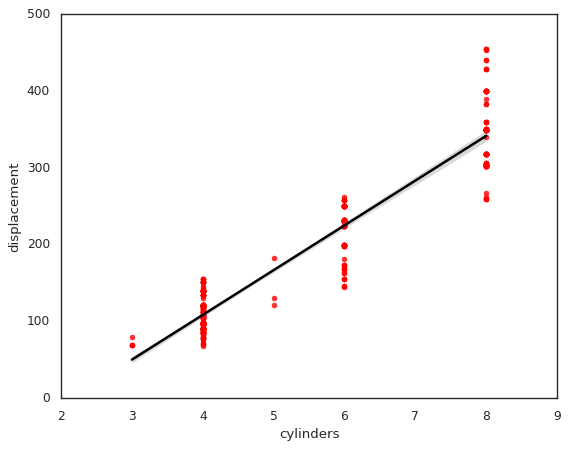

In [85]:
# Par con mayor correlación
corr_max = 0
pair_corr = ()
for i in Mcorr.columns:
    for j in Mcorr.columns:
        if i != j and abs(Mcorr.loc[i, j]) > corr_max: # con i |= j se evita la autocorrelación
            corr_max = abs(Mcorr.loc[i, j])
            pair_corr = (i, j)

# Columnas con mayor correlación
I, J = pair_corr

print(f'El par de variables con mayor correlación es: {I} y {J}.')
# Gráfico de dispersión de las variables con mayor correlación
sb.regplot(x=I, y=J, data=mpg, color="red", line_kws={"color": "black"})
plt.xlabel(I)
plt.ylabel(J)
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.

[Vinculo hacia Github](https://github.com/RFuentesAlbornoz/MachingLearning_UTAL/blob/ac7e70dcb39129da2febd1ca34f1aec3c6b90d09/Regresi%C3%B3n_lineal_RFuentes.ipynb)